The dataset used can be found here: https://www.kaggle.com/datasets/mikhail1681/walmart-sales

In [1]:
import pandas as pd
df =pd.read_csv('data/Walmart_Sales.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
#Basic data overview
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None
(6435, 8)


In [57]:
# Handling missing values if there are any
print(df.isna().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


The DataFrame does not contain any missing values

In [56]:
# Descriptive Statistics
# Numeric columns
numeric = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment', 'CPI', 'Date']
for col in numeric:
    print(col)
    print(df[col].describe())
# Non-numeric columns
non_numeric = ['Holiday_Flag']
for col in non_numeric:
    print(df[col].value_counts())

Weekly_Sales
count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64
Temperature
count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64
Fuel_Price
count    6435.000000
mean        3.358607
std         0.459020
min         2.472000
25%         2.933000
50%         3.445000
75%         3.735000
max         4.468000
Name: Fuel_Price, dtype: float64
Unemployment
count    6435.000000
mean        7.999151
std         1.875885
min         3.879000
25%         6.891000
50%         7.874000
75%         8.622000
max        14.313000
Name: Unemployment, dtype: float64
CPI
count    6435.000000
mean      171.578394
std        39.356712
min       126.064000
25%       131.735000
50%       182.616521
75% 

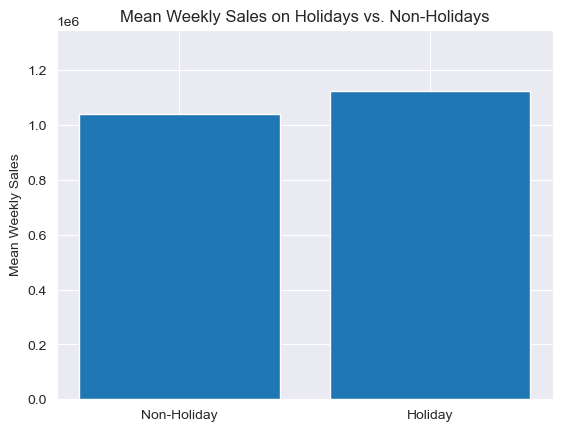

In [58]:
# Visualize the average weekly sales on holidays vs non-holidays
import matplotlib.pyplot as plt

mean_sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
fig, ax = plt.subplots()
ax.bar(mean_sales_by_holiday.index, mean_sales_by_holiday)
ax.set_xticks([0,1])
ax.set_xticklabels(['Non-Holiday', 'Holiday'])
ax.set_ylabel('Mean Weekly Sales')
ax.set_ylim(0, mean_sales_by_holiday.max() * 1.2)
ax.set_title('Mean Weekly Sales on Holidays vs. Non-Holidays')
plt.show()

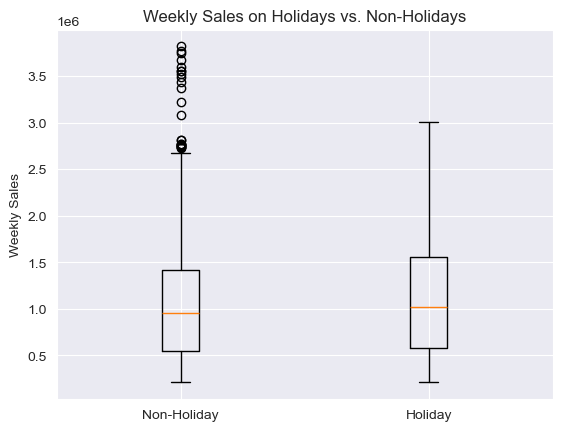

In [59]:
# Visualize the distribution of weekly sales on Holiday vs non-holiday
fig2, ax = plt.subplots()
ax.boxplot([df.loc[df['Holiday_Flag'] == 0, 'Weekly_Sales'], df.loc[df['Holiday_Flag'] == 1, 'Weekly_Sales']])
ax.set_xticks([1, 2])
ax.set_xticklabels(['Non-Holiday', 'Holiday'])
ax.set_ylabel('Weekly Sales')
ax.set_title('Weekly Sales on Holidays vs. Non-Holidays')
plt.show()

Sales are higher during holidays

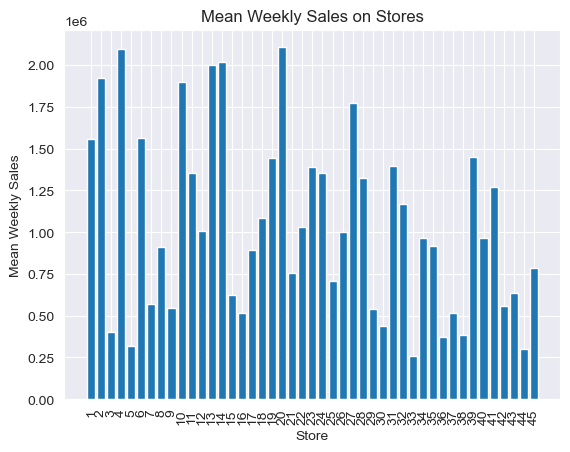

In [72]:
# Visualize the average weekly sales of all stores
mean_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean()

fig1, ax = plt.subplots()
ax.bar(mean_sales_by_store.index, mean_sales_by_store)
ax.set_xticks(mean_sales_by_store.index)
ax.set_xticklabels(mean_sales_by_store.index, rotation=90)
ax.set_xlabel('Store')
ax.set_ylabel('Mean Weekly Sales')
ax.set_title('Mean Weekly Sales on Stores')
plt.show()

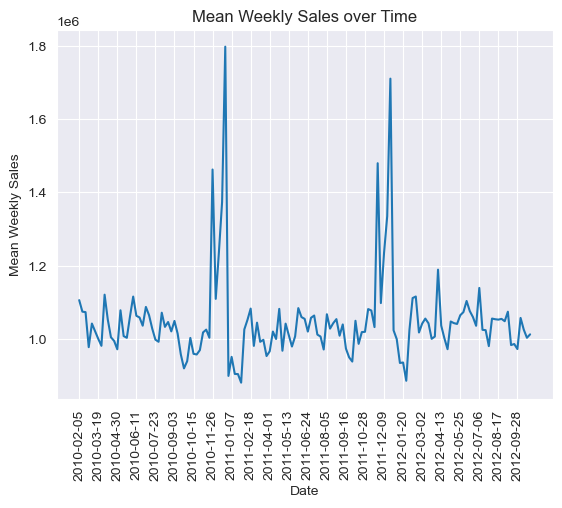

In [63]:
# Visualize the average weekly sales over time
mean_weekly_sales = df.groupby('Date')['Weekly_Sales'].mean()
fig3, ax = plt.subplots()
ax.plot(mean_weekly_sales.index, mean_weekly_sales)
ax.set_xlabel('Date')
ax.set_xticks(mean_weekly_sales.index[::6])
ax.set_ylabel('Mean Weekly Sales')
ax.set_title('Mean Weekly Sales over Time')
plt.xticks(rotation=90)
plt.show()

Sales peak in November and December and are lowest in January and February

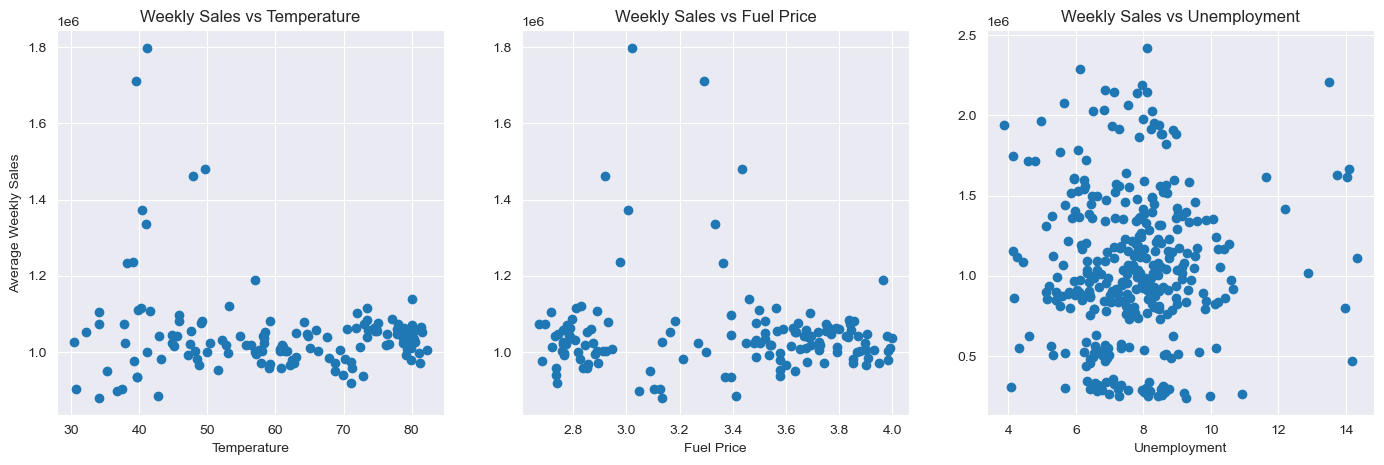

In [64]:
# Visualize weekly sales vs Temperature, Fuel Price and Unemployment
mean_temperature = df.groupby('Date')['Temperature'].mean()
mean_fuel_price = df.groupby('Date')['Fuel_Price'].mean()
mean_unemployment = df.groupby('Unemployment')['Weekly_Sales'].mean()
unemployment = df['Unemployment'].unique()

fig4, ax = plt.subplots(1,3, figsize=(17,5))
ax[0].scatter(mean_temperature, mean_weekly_sales)
ax[1].scatter(mean_fuel_price, mean_weekly_sales)
ax[2].scatter(unemployment, mean_unemployment)
ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Fuel Price')
ax[2].set_xlabel('Unemployment')
ax[0].set_ylabel('Average Weekly Sales')
ax[0].set_title('Weekly Sales vs Temperature')
ax[1].set_title('Weekly Sales vs Fuel Price')
ax[2].set_title('Weekly Sales vs Unemployment')

plt.show()

None of the three variables seem to affect sales

The same visualizations done in Seaborn

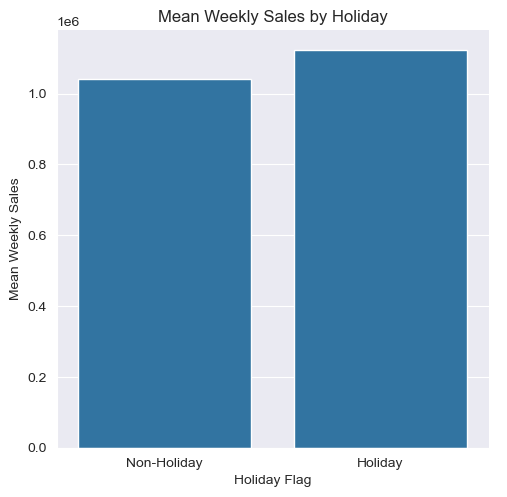

In [90]:
#Visualizations in Seaborn

import seaborn as sns
g = sns.catplot(x='Holiday_Flag', y='Weekly_Sales', data=df, kind='bar', errorbar=None)
g.set(title='Mean Weekly Sales by Holiday', xlabel='Holiday Flag', ylabel='Mean Weekly Sales')
g.set_xticklabels(['Non-Holiday', 'Holiday'])
plt.show()

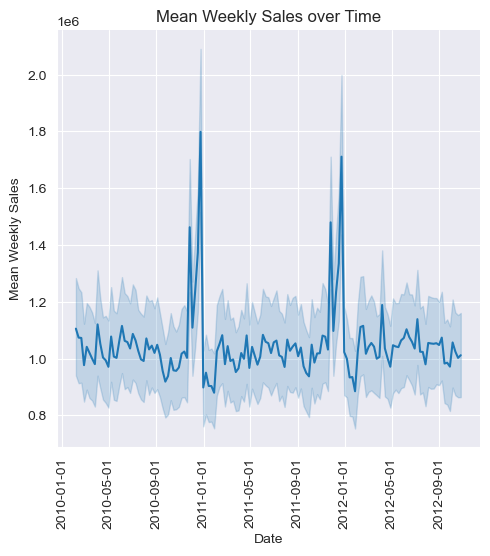

In [95]:
g = sns.relplot(x='Date', y='Weekly_Sales', data=df, kind='line')
g.set(title ='Mean Weekly Sales over Time', xlabel='Date', ylabel='Mean Weekly Sales')
g.set_xticklabels(rotation=90)
plt.show()

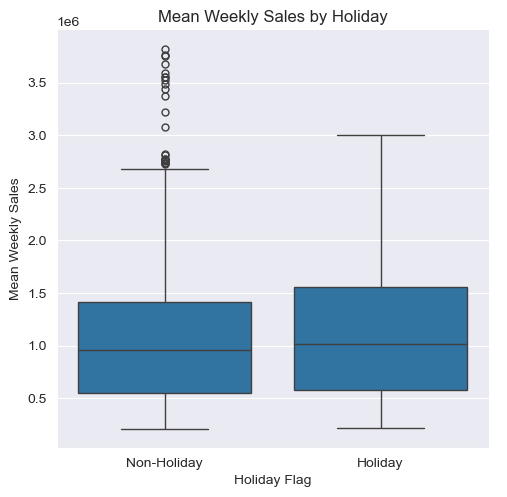

In [91]:
g = sns.catplot(x='Holiday_Flag', y='Weekly_Sales', data=df, kind='box')
g.set(title='Mean Weekly Sales by Holiday', xlabel='Holiday Flag', ylabel='Mean Weekly Sales')
g.set_xticklabels(['Non-Holiday', 'Holiday'])
plt.show()

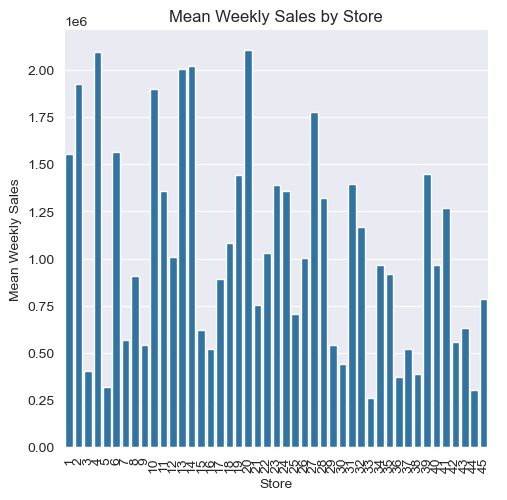

In [88]:
g = sns.catplot(x='Store', y='Weekly_Sales', data=df, kind='bar', errorbar=None)
g.set(title='Mean Weekly Sales by Store', xlabel='Store', ylabel='Mean Weekly Sales')
plt.xticks(rotation=90)
plt.show()